<a href="https://colab.research.google.com/github/RafaelColin/EDP/blob/main/Dirichlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de un problema de Dirichlet

La solución de la ecuación
$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$
$$0<x<a \;, \; 0<x<b$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(a,y)=0$$
$$u(x,0)=0, \;\;\; u(x,b)=f(x)$$
Y la condición inicial:
$$f(x)=100,\; a=1, \; b=1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=200\sum_{n=1}^{\infty} [\frac{1-(-1)^{n}}{nπsinh(nπ)}]  \sin(n\pi x)sinh(nπy).$$

In [1]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [2]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] =100
    return y

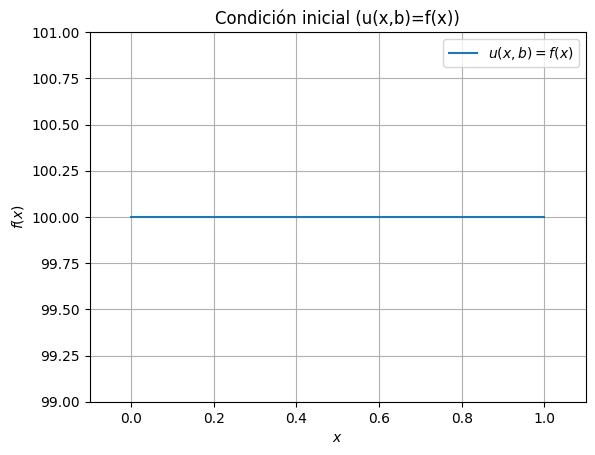

In [3]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,b)=f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,b)=f(x))")
xlim([-0.10,1.10]),ylim([99,101]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,b)=f(x)=100$.

In [4]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (-1)**(n+1)*sin(n*pi*x)/(n)
    return (2.0/pi)*f

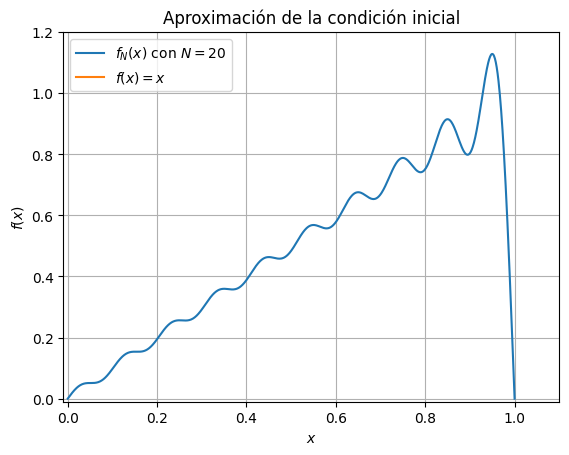

In [5]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,1.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

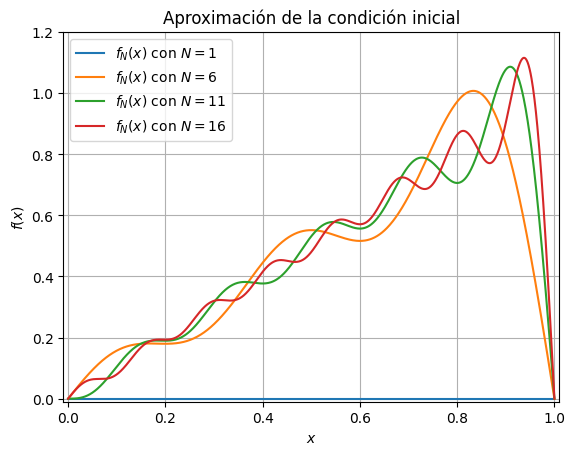

In [6]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [7]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (-1)**(n+1)*sin(n*pi*x)/(n)*exp(-n**2*t[i])
    return (2.0/pi)*f

In [8]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

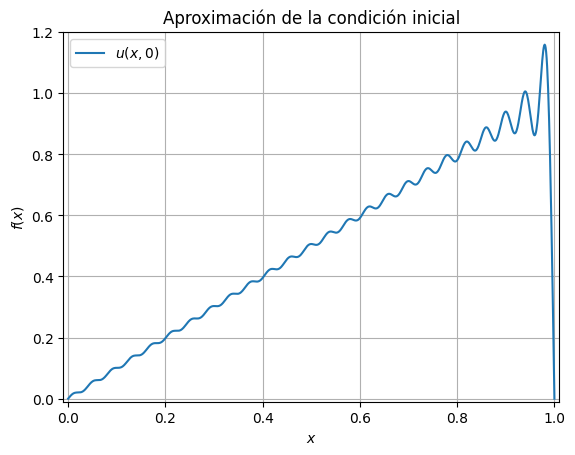

In [9]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

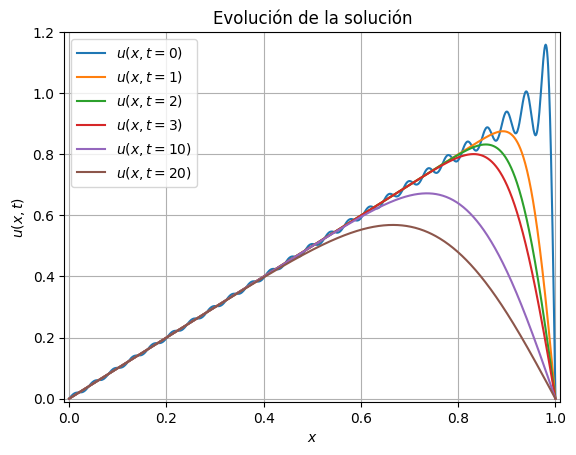

In [10]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

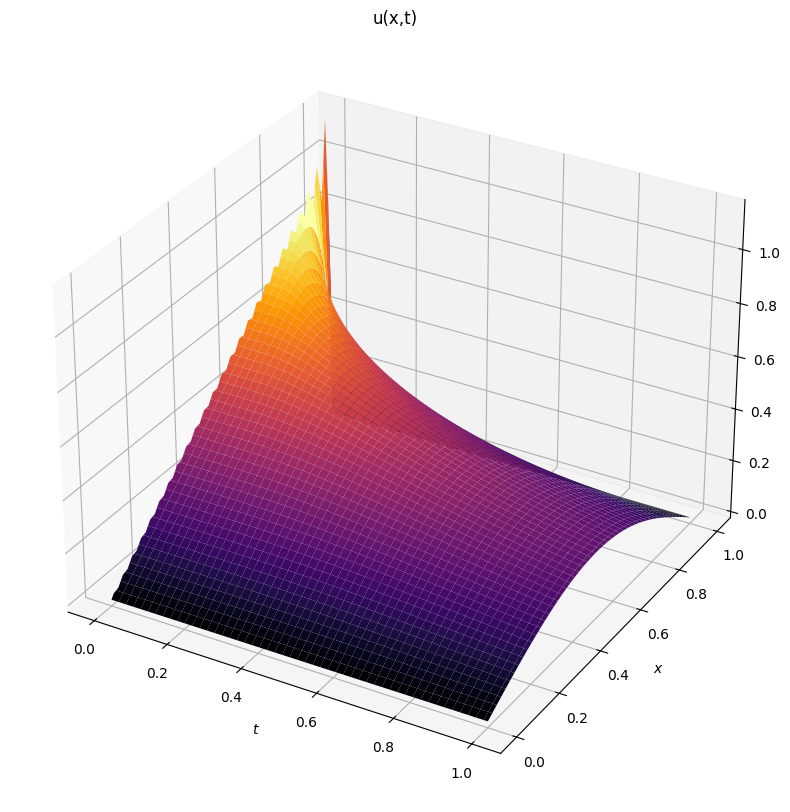

In [11]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

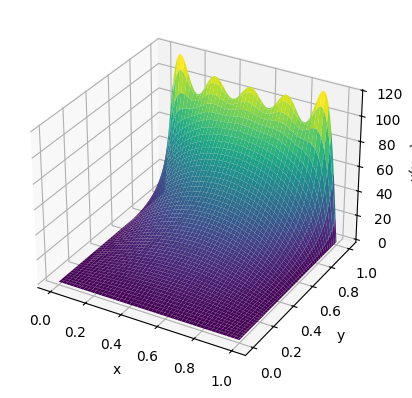

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def u(x, y, N=10):
    total = 0
    for n in range(1, N+1):
        coeff = 200 * (1 - (-1)**n) / (n * np.pi * np.sinh(n * np.pi))
        total += coeff * np.sin(n * np.pi * x) * np.sinh(n * np.pi * y)
    return total

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = u(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
plt.show()